In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import scipy as sci

In [2]:
thick_ls = (116, 332)
length_ls = (6, 8)
# no_ls = (1, 2, 3)
fdir = "../data/bending_stiffness/"
colors = ("tab:blue", "tab:orange", "tab:green", "tab:red")

In [3]:
def linear(params, x):
    return params[0] * x + params[1]

In [4]:
IN2M = 0.0254
LB2N = 4.44822


../data/bending_stiffness/x_f_6in_116_1.npz
../data/bending_stiffness/x_f_6in_116_2.npz
../data/bending_stiffness/x_f_6in_116_3.npz
3277302683.146269
47767808.75908283
../data/bending_stiffness/x_f_8in_116_1.npz
../data/bending_stiffness/x_f_8in_116_2.npz
../data/bending_stiffness/x_f_8in_116_3.npz
5133880285.424362
53617703.4871121
../data/bending_stiffness/x_f_6in_332_1.npz
../data/bending_stiffness/x_f_6in_332_2.npz
../data/bending_stiffness/x_f_6in_332_3.npz
2542839915.1078176
27199611.418162897
../data/bending_stiffness/x_f_8in_332_1.npz
../data/bending_stiffness/x_f_8in_332_2.npz
../data/bending_stiffness/x_f_8in_332_3.npz
4233433396.7161474
65834286.88056221


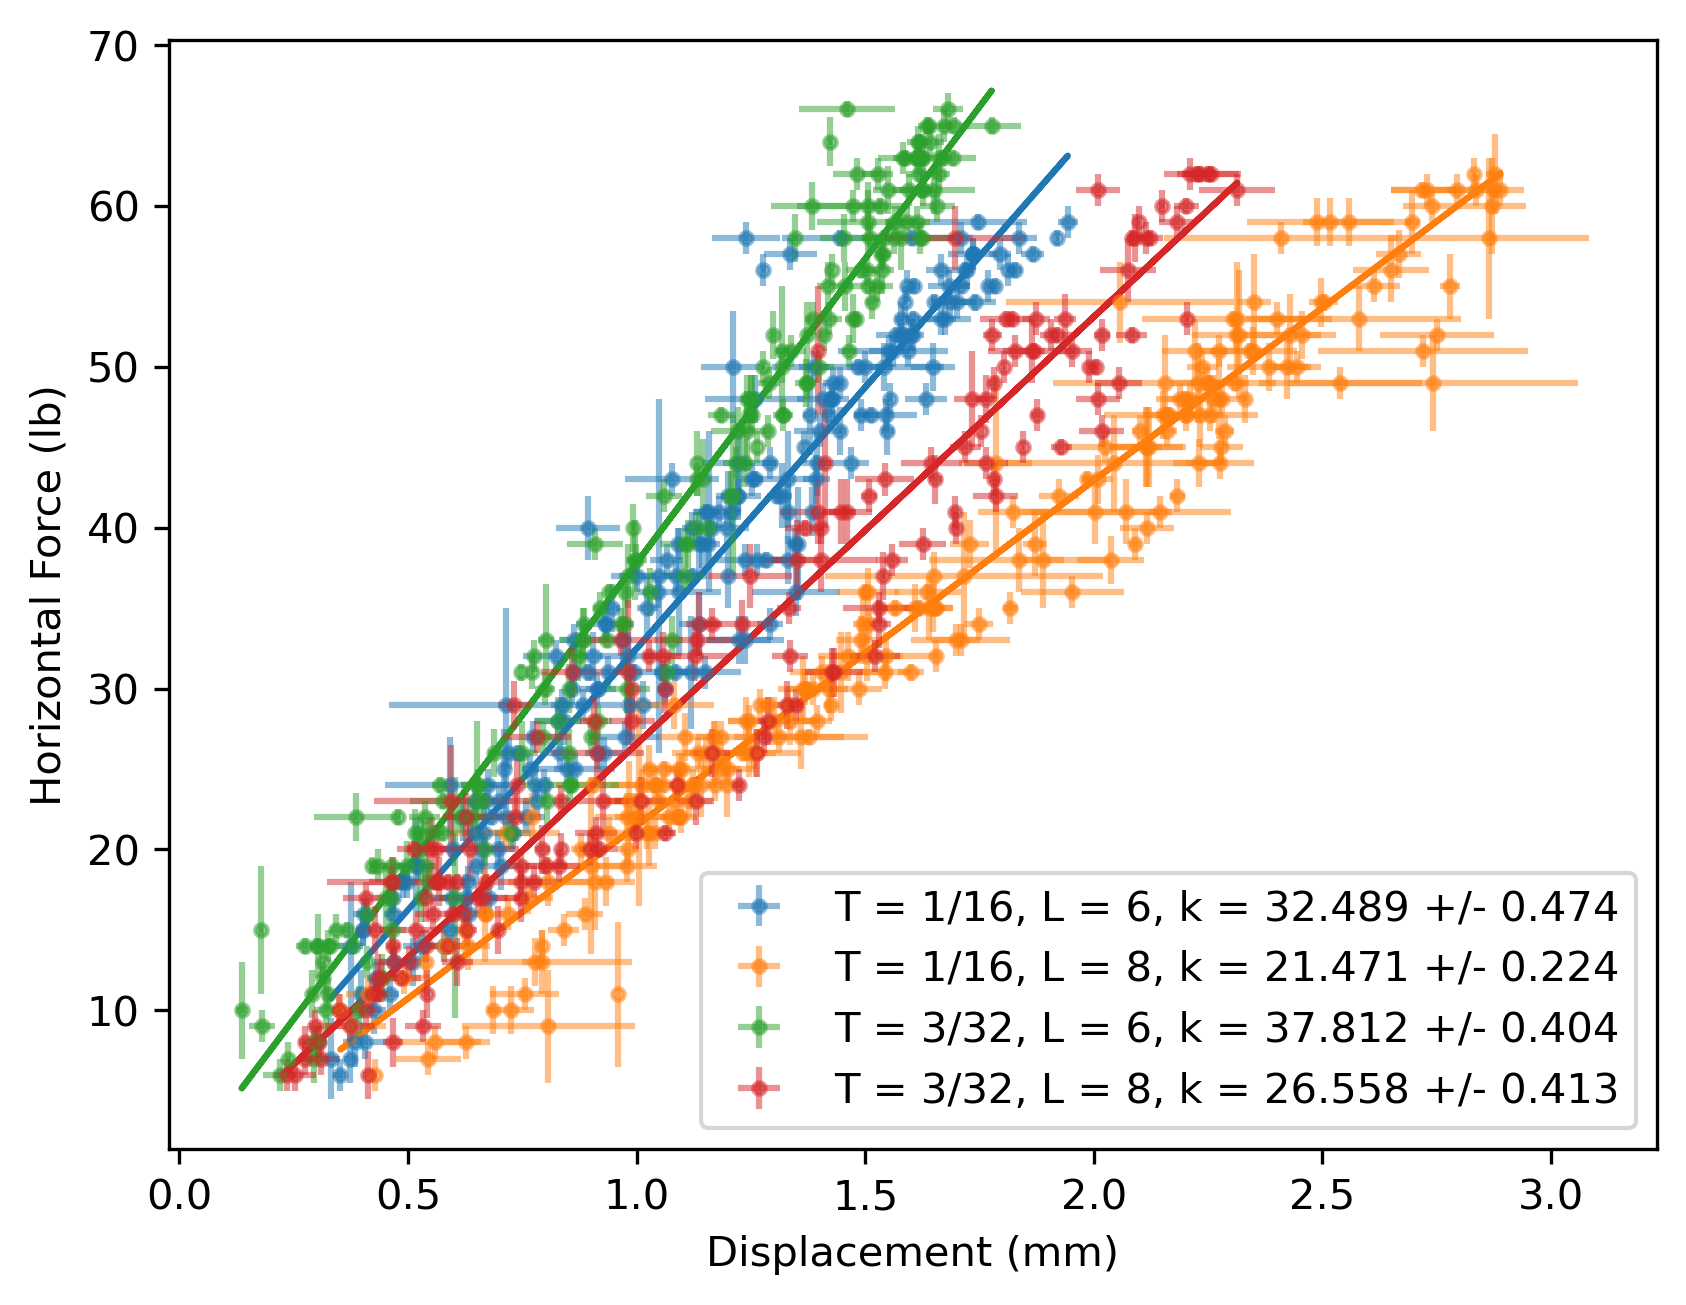

In [13]:
plt.figure(dpi=300)
k = []
kerr = []
fit_model = sci.odr.Model(linear)
for i, (thick, length) in enumerate(itertools.product(thick_ls, length_ls)):
    xls, fls, xerrls, ferrls = [], [], [], []
    for no in range(3):
        no += 1
        print(f"{fdir}x_f_{length}in_{thick}_{no}.npz")
        fstream = np.load(f"{fdir}x_f_{length}in_{thick}_{no}.npz")
        x, f, xerr, ferr = fstream['displacement'], -fstream['force'], fstream['derr'], fstream['ferr']
        msk = f > 5
        xls.append(x[msk])
        fls.append(f[msk])
        xerrls.append(xerr[msk])
        ferrls.append(ferr[msk])
    x, f, xerr, ferr = np.concatenate(xls), np.concatenate(fls), np.concatenate(xerrls), np.concatenate(ferrls)
    fit_data = sci.odr.RealData(x=x, y=f, sx=xerr, sy=ferr)
    fitter = sci.odr.ODR(fit_data, fit_model, beta0=[1, -1])
    fit_res = fitter.run()
    x_intercept = -fit_res.beta[1] / fit_res.beta[0]
    tk_str = str(thick)
    plt.errorbar(x - x_intercept, f, xerr=xerr, yerr=ferr, ls='', fmt='.', alpha=0.5, \
                 label=f"T = {tk_str[0]}/{tk_str[1:]}, L = {length}, k = {fit_res.beta[0]:.3f} +/- {fit_res.sd_beta[0]:.3f}", c=colors[i])
    plt.plot(x - x_intercept, linear(fit_res.beta, x), c=colors[i])
    kSI = fit_res.beta[0] * LB2N * 1e3
    inertia = IN2M**4 * float(tk_str[0]) / float(tk_str[1:])
    lng = length * IN2M
    # print(float(tk_str[0]) / float(tk_str[1]))
    print(kSI / 3 / (inertia * 2) * lng**3)
    print(kSI / 3 / (inertia * 2) * lng**3 * fit_res.sd_beta[0] / fit_res.beta[0])

    k.append(fit_res.beta[0])
    kerr.append(fit_res.sd_beta[0])
plt.ylabel("Horizontal Force (lb)")
plt.xlabel("Displacement (mm)")
plt.legend()
plt.savefig("images/elasticity.png", bbox_inches='tight')
# plt.title(f"{thick}, {length}, k={fit_res.beta[0]}")

In [46]:
def a_over_b(a, b, da, db):
    err = ((da / b)**2 + (db * a / b**2)**2)**0.5
    return a / b, err

In [49]:
st116 = a_over_b(k[0], k[1], kerr[0], kerr[1])
print(f"{st116[0]:.5f}, {st116[1]:.5f}")
st332 = a_over_b(k[2], k[3], kerr[2], kerr[3])
print(f"{st332[0]:.5f}, {st332[1]:.5f}")

1.51317, 0.02713
1.42378, 0.02687


In [51]:
sl6 = a_over_b(k[0], k[2], kerr[0], kerr[2])
print(f"{sl6[0]:.5f}, {sl6[1]:.5f}")
sl8 = a_over_b(k[1], k[3], kerr[1], kerr[3])
print(f"{sl8[0]:.5f}, {sl8[1]:.5f}")

0.85922, 0.01553
0.80847, 0.01514


In [12]:
tk_str

'332'